# Drowsiness Detection Model

This notebook aims to create a Drowsiness Detection model using a ResNet Model. The model classifies images into the following categories:

1. Eyes closed
2. Eyes open



## Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.optimizers import Adam,SGD
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

## Dataset

The Drowsiness Detection Dataset includes sequences of eye images with labels indicating whether the eyes are open or closed. The dataset is diverse and captures subjects of varying demographics under controlled driving scenarios.

## Data Loading and Preprocessing

The dataset is loaded using Kaggle API, and the eye images are preprocessed.

In [ ]:
# Upload your Kaggle API key (kaggle.json) file
from google.colab import files
files.upload()

# Move the Kaggle API key to the required directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d hazemfahmy/openned-closed-eyes
!unzip -q openned-closed-eyes.zip -d dataset-folder

Saving kaggle.json to kaggle.json
 97% 508M/526M [00:03<00:00, 125MB/s]
100% 526M/526M [00:03<00:00, 157MB/s]


In [ ]:
train_data_path = '/content/dataset-folder/TrainingSet/TrainingSet'
test_data_path = '/content/dataset-folder/TestSet/TestSet'

In [ ]:
training_data = keras.preprocessing.image_dataset_from_directory(
    test_data_path,
    batch_size=128,
    image_size=(227, 227),
    shuffle=True,
    seed=123,
    subset='training',
    validation_split=0.2
)

test_data = keras.preprocessing.image_dataset_from_directory(
    train_data_path,
    batch_size=128,
    image_size=(227, 227),
    shuffle=True,
    seed=123,
    validation_split=0.8,
    subset='validation'
)


Found 4232 files belonging to 2 classes.
Using 3386 files for training.
Found 1704 files belonging to 2 classes.
Using 1363 files for validation.


## Sample Images
Visualizing a few sample images from the training dataset:

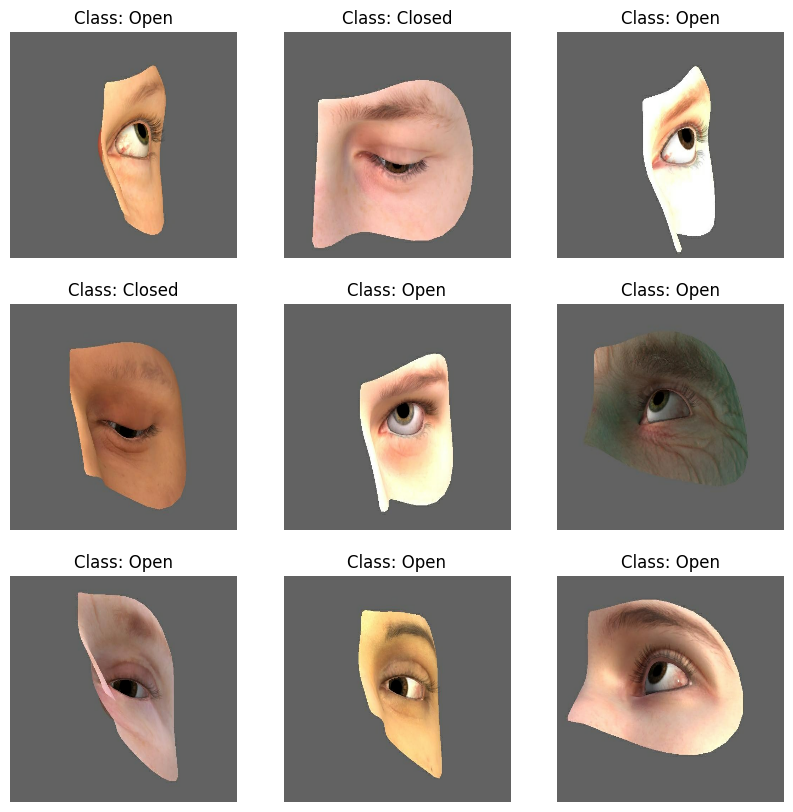

In [ ]:
class_mapping = {0: "Closed", 1: "Open"}
plt.figure(figsize=(10, 10))
for images, labels in training_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        text_label = class_mapping[labels[i].numpy()]

        plt.title(f"Class: {text_label}")
        plt.axis("off")
plt.show()

## Model Architecture
The Drowsiness Detection model is built using a Sequential model with a Convolutional Neural Network (CNN) architecture.

The model is specific CNN, AlexNet model is implemented using Keras, a high-level neural networks API running on top of TensorFlow.



In [3]:
alexnet_model = Sequential()
alexnet_model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(227, 227, 3)))
alexnet_model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
alexnet_model.add(Conv2D(256, (5, 5), activation='relu'))
alexnet_model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
alexnet_model.add(Conv2D(384, (3, 3), activation='relu'))
alexnet_model.add(Conv2D(384, (3, 3), activation='relu'))
alexnet_model.add(Conv2D(256, (3, 3), activation='relu'))
alexnet_model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
alexnet_model.add(Flatten())
alexnet_model.add(Dense(4096, activation='relu'))
alexnet_model.add(Dropout(0.5))
alexnet_model.add(Dense(4096, activation='relu'))
alexnet_model.add(Dropout(0.5))
alexnet_model.add(Dense(2, activation='softmax'))

alexnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 384)         885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 384)         1

## Model Training
The model is compiled using :
*  Loss function : sparse_categorical_crossentropy
*  Optimizer: SGD
*  Evaluation metric : Accuracy
*  Learning Rate :0.00001
*  Epoch: 15
*  Batch size:128




In [ ]:
alexnet_model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=0.00001), metrics=['accuracy'])

In [ ]:
epochs = 15
history_alexnet = alexnet_model.fit(
    training_data,
    validation_data=test_data,
    epochs=epochs
)

Epoch 1/15
27/27 [==============================] - 18s 475ms/step - loss: 0.7280 - accuracy: 0.5068 - val_loss: 0.6957 - val_accuracy: 0.5613
Epoch 2/15
27/27 [==============================] - 11s 368ms/step - loss: 0.6525 - accuracy: 0.6190 - val_loss: 0.6314 - val_accuracy: 0.6434
Epoch 3/15
27/27 [==============================] - 9s 267ms/step - loss: 0.6037 - accuracy: 0.6926 - val_loss: 0.5931 - val_accuracy: 0.6919
Epoch 4/15
27/27 [==============================] - 10s 331ms/step - loss: 0.5674 - accuracy: 0.7377 - val_loss: 0.5631 - val_accuracy: 0.7439
Epoch 5/15
27/27 [==============================] - 11s 374ms/step - loss: 0.5408 - accuracy: 0.7688 - val_loss: 0.5407 - val_accuracy: 0.7638
Epoch 6/15
27/27 [==============================] - 10s 285ms/step - loss: 0.5209 - accuracy: 0.7853 - val_loss: 0.5228 - val_accuracy: 0.7821
Epoch 7/15
27/27 [==============================] - 10s 311ms/step - loss: 0.5037 - accuracy: 0.8012 - val_loss: 0.5054 - val_accuracy: 0.8004


## Training and Validation Curves
Visualizing the training and validation loss and accuracy over epochs:

Plot training and validation loss:



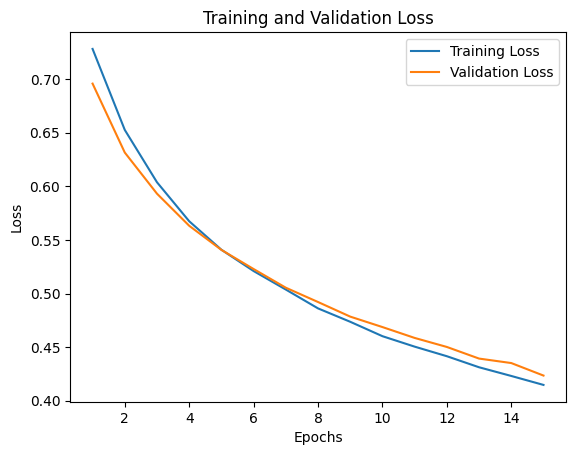

In [ ]:
# Loss plot
epochs_range = range(1, epochs + 1)

print("Plot training and validation loss:\n")
plt.figure()
plt.plot(epochs_range, history_alexnet.history['loss'], label='Training Loss')
plt.plot(epochs_range, history_alexnet.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Plot training and validation accuracy:



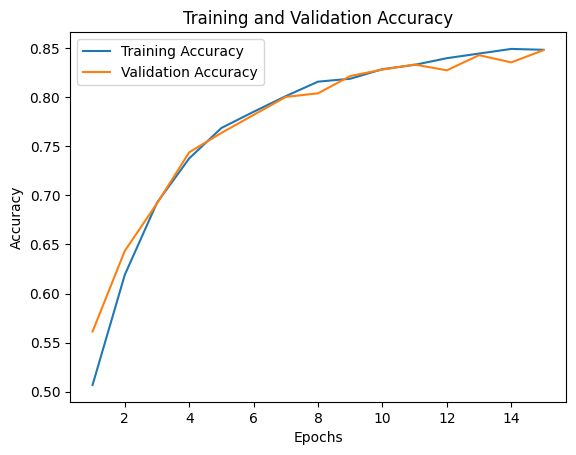

In [ ]:
#Accuracy Plot
print("Plot training and validation accuracy:\n")
plt.figure()
plt.plot(epochs_range, history_alexnet.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history_alexnet.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

## Model Evaluation
The model's performance is evaluated on a separate test dataset, and accuracy metrics are used.

In [ ]:
loss, accuracy = alexnet_model.evaluate(test_data)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

11/11 [==============================] - 2s 91ms/step - loss: 0.4235 - accuracy: 0.8481
Validation Accuracy: 84.81%


## Visualizing Predictions
Visualizing model predictions on a subset of the test dataset:

4/4 [==============================] - 1s 33ms/step


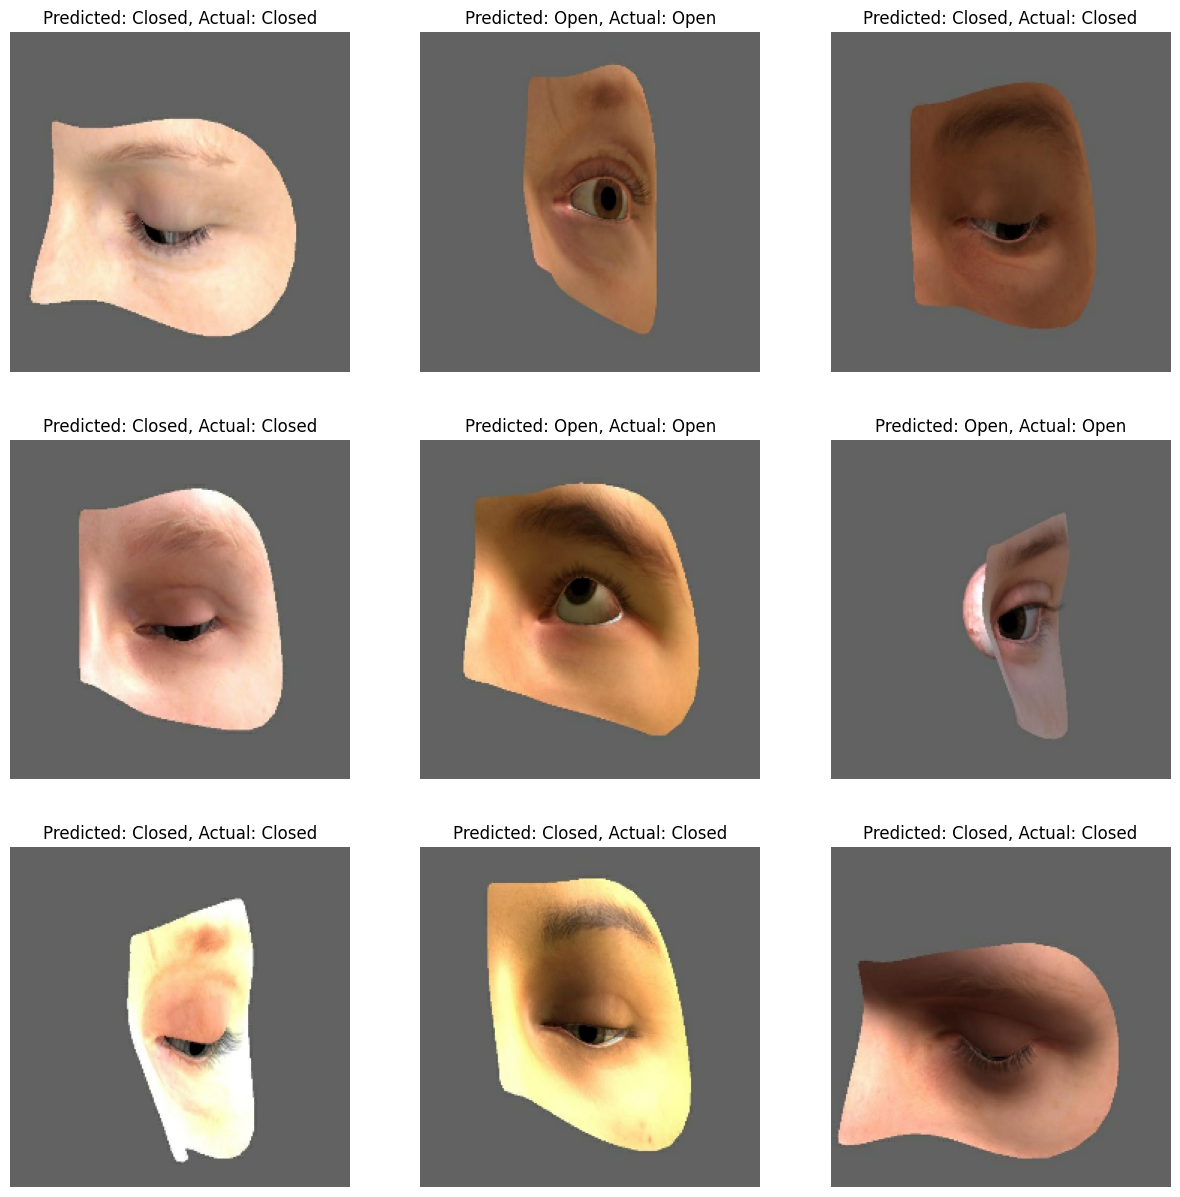

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_data.take(1):
    predictions = alexnet_model.predict(images)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class = class_mapping[np.argmax(predictions[i])]
        true_class = class_mapping[labels[i].numpy()]

        plt.title(f"Predicted: {predicted_class}, Actual: {true_class}")
        plt.axis("off")
plt.show()